In [1]:
from helper import phys
import numpy as np
import pandas as pd
import astropy.io.ascii as asci
import scipy.optimize as op
import astropy.constants as const
from astropy.time import Time
from astropy.table import Table
from collections import OrderedDict as odict
from allsn_info import get_at2019dge
from helper.mcmcfit import mylinear_fit

In [3]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
fs = 14
matplotlib.rcParams['font.size']=fs

In [4]:
tb = pd.read_csv('../data/otherSN/Yao2020/bbdata.csv')
Tbbs = tb["Tbb"].values
Tbbs_uncl = tb["Tbb_uncl"].values
Tbbs_uncr = tb["Tbb_uncr"].values

Rbbs = tb["Rbb"].values
Rbbs_unc = tb["Rbb_unc"].values
Rbbs_uncl = tb["Rbb_uncl"].values
Rbbs_uncr = tb["Rbb_uncr"].values

lgLbbs = tb["lgLbb"].values
lgLbbs_unc = tb["lgLbb_unc"].values
lgLbbs_uncl = tb["lgLbb_uncl"].values
lgLbbs_uncr = tb["lgLbb_uncr"].values

toff = 3.21
trf = tb["phase"].values/(1+0.0213)
#ix_rough = np.zeros(len(lgLbbs), dtype = bool)

In [5]:
print ("peak temperature")
print ("%.2f + %.2f - %.2f e+4 K"%(Tbbs[1]/1e+4, Tbbs_uncr[1]/1e+4, Tbbs_uncl[1]/1e+4))

peak temperature
2.27 + 0.76 - 0.41 e+4 K


In [6]:
np.mean(Rbbs[8:])

6561.5317963135185

In [7]:
2e+15 / 7e+10

28571.428571428572

In [8]:
tb1= pd.read_csv('../data/otherSN/iPTF16hgs/bbdata.csv')
toff1 = 12.7 # from Kishalay's paper

#ix = np.all([(tb1["phase"].values+toff1) > 12, (tb1["phase"].values+toff1) <24, tb1["Lbb_unc"].values==0], axis=0)
#tb1 = tb1[~ix]
#ix = (tb1["phase"].values+toff1) > 30
#tb1 = tb1[~ix]

Tbbs1 = tb1["Tbb"].values
Tbbs_uncl1 = tb1["Tbb_uncl"].values
Tbbs_uncr1 = tb1["Tbb_uncr"].values

Rbbs1 = tb1["Rbb"].values
Rbbs_unc1 = tb1["Rbb_unc"].values
Rbbs_uncl1 = tb1["Rbb_uncl"].values
Rbbs_uncr1 = tb1["Rbb_uncr"].values

lgLbbs1 = tb1["lgLbb"].values
lgLbbs_unc1 = tb1["lgLbb_unc"].values
lgLbbs_uncl1 = tb1["lgLbb_uncl"].values
lgLbbs_uncr1 = tb1["lgLbb_uncr"].values

trf1 = tb1["phase"].values/(1+0.017)
#ix_rough1 = np.zeros(len(lgLbbs1), dtype = bool)

In [9]:
tb2 = pd.read_csv('../data/otherSN/De2018/bbdata.csv')
toff2 = 5.86 + 0.936

Tbbs2 = tb2["Tbb"].values
Tbbs_uncl2 = tb2["Tbb_uncl"].values
Tbbs_uncr2 = tb2["Tbb_uncr"].values

Rbbs2 = tb2["Rbb"].values
Rbbs_unc2 = tb2["Rbb_unc"].values
Rbbs_uncl2 = tb2["Rbb_uncl"].values
Rbbs_uncr2 = tb2["Rbb_uncr"].values

lgLbbs2 = tb2["lgLbb"].values
lgLbbs_unc2 = tb2["lgLbb_unc"].values
lgLbbs_uncl2 = tb2["lgLbb_uncl"].values
lgLbbs_uncr2 = tb2["lgLbb_uncr"].values

trf2 = tb2["phase"].values / (1+0.063)
#ix_rough1 = np.zeros(len(lgLbbs1), dtype = bool)

### Construct Bolometric Evolution 

In [10]:
def get_v_atpeak(trf, Rbbs, Rbbs_unc, ax):
    x = trf[1:6] 
    y = Rbbs[1:6] 
    ey = Rbbs_unc[1:6] 
    multi = phys.sr / (24 * 3600)
    slope, eslope, offset = mylinear_fit(x, y, ey, npar = 2)
    
    v = slope * multi / 1e+5 # in km / s
    ev = eslope * multi / 1e+5 # in km / s
    
    tnew = np.linspace(min(x)-0.1, max(x)+0.1)
    rnew = slope * tnew + offset
    ax.plot(tnew, rnew/1e+3, '--', color = 'palevioletred', zorder = 1)
    ax.text(np.median(tnew), 3, '%d'%v + r'$\pm$' + '%d'%ev + r'$\; \rm km \, s^{-1}$', color = 'palevioletred', fontsize = fs-2)

In [11]:
def get_refineaxis(ax0, ax1, ax2, toff):
    ax0.set_ylabel(r'${\rm log} ( L_{\rm bb} /{\rm(erg\,s^{-1} } ))$')
    ax1.set_ylabel(r'$T_{\rm bb}$ ('+r'$10^{3}$'+'K)')
    ax2.set_ylabel(r'$R_{\rm bb}$ ('+r'$10^{3}R_{\odot}$'+')')
    #ax2.set_xlabel(r'$\Delta t+%.1f$'%(toff)+' or Time since explosion (d)')
    ax2.set_xlabel('Rest-frame days since explosion')
    ax1.set_xticklabels([])
    ax0.set_xticklabels([])
    
    ax1.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax1.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax2.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax2.xaxis.set_minor_locator(plt.MultipleLocator(1))
    ax0.xaxis.set_major_locator(plt.MultipleLocator(5))
    ax0.xaxis.set_minor_locator(plt.MultipleLocator(1))
    
    ax1.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax1.yaxis.set_minor_locator(plt.MultipleLocator(1))
    ax2.yaxis.set_major_locator(plt.MultipleLocator(5))
    ax2.yaxis.set_minor_locator(plt.MultipleLocator(1))
    ax0.yaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax0.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
    
    ax0.tick_params(direction='in', axis='both', which = 'both', top=True, right=True)
    ax1.tick_params(direction='in', axis='both', which = 'both', top=True, right=True)
    ax2.tick_params(direction='in', axis='both', which = 'both', top=True, right=True)
    ax1.tick_params(which = 'major', length = 4)
    ax1.tick_params(which = 'minor', length = 2)
    ax2.tick_params(which = 'major', length = 4)
    ax2.tick_params(which = 'minor', length = 2)
    ax0.tick_params(which = 'major', length = 4)
    ax0.tick_params(which = 'minor', length = 2)

In [12]:
def get_Lbol_decline_rate1(tphase, lgL_data, lgL_unc_data, ax):
    x = tphase[:5] 
    y = lgL_data[:5] 
    ey = lgL_unc_data[:5] 
    slope, eslope, offset = mylinear_fit(x, y, ey, npar = 2)
    
    tnew = np.linspace(min(x)-0.1, max(x)+0.1)
    lgLnew = slope * tnew + offset
    color = 'deepskyblue'
    ax.plot(tnew, lgLnew, '--', color = color, zorder = 2)
    rate = -2.5 * (lgLnew[-1] - lgLnew[0]) / (tnew[-1] - tnew[0]) # mag per day
    ax.text(np.median(tnew)+2, np.median(lgLnew)-0.25, '%.2f'%rate + r'$\; \rm mag \, d^{-1}$', color = color, 
            fontsize=fs-2, zorder = 2)
    
def get_Lbol_decline_rate2(tphase, lgL_data, lgL_unc_data, ax):
    x = tphase[5:15] 
    y = lgL_data[5:15] 
    ey = lgL_unc_data[5:15] 
    slope, eslope, offset = mylinear_fit(x, y, ey, npar = 2)
    
    tnew = np.linspace(min(x)-0.1, max(x)+0.1)
    lgLnew = slope * tnew + offset
    color = 'deepskyblue'
    ax.plot(tnew, lgLnew, '--', color = color, zorder = 2)
    rate = -2.5 * (lgLnew[-1] - lgLnew[0]) / (tnew[-1] - tnew[0]) # mag per day
    ax.text(np.median(tnew)+1, np.median(lgLnew), '%.2f'%rate + r'$\; \rm mag \, d^{-1}$', color = color, 
            fontsize=fs-2, zorder = 2)

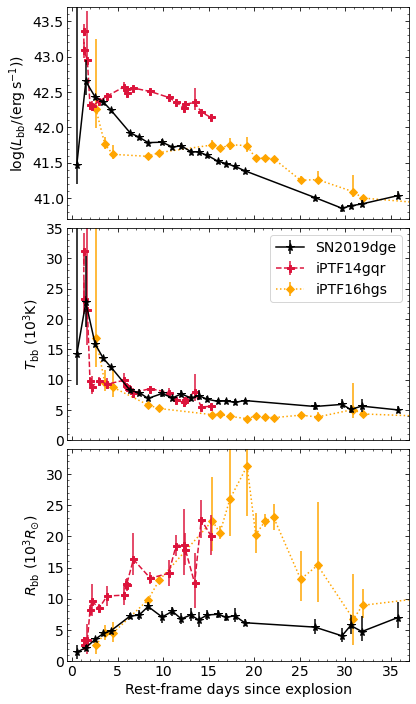

In [13]:
plt.figure(figsize=(6., 10))
ax0 = plt.subplot(311)
ax1 = plt.subplot(312)
ax2 = plt.subplot(313)
ms = 8

########## Lbb ##########
# AT2019dge
ax0.errorbar(trf+toff, lgLbbs, [lgLbbs_uncl, lgLbbs_uncr], 
             fmt='.-', marker = "*", color = "k", zorder = 3, markersize = ms)
# iPTF14gqr
ax0.errorbar(trf2+toff2, lgLbbs2, [lgLbbs_uncl2, lgLbbs_uncr2], 
             fmt = '.--', color = "crimson", marker = "P", zorder = 2, markersize = ms-1)
# iPTF16hgs
ax0.errorbar(trf1+toff1, lgLbbs1, [lgLbbs_uncl1, lgLbbs_uncr1], 
             fmt = ".:", color = "orange", marker = "D", zorder = 1, markersize = ms-3)
# others
ax0.set_ylim(40.7, 43.7)
#get_Lbol_decline_rate1(trf+toff, lgLbbs, lgLbbs_unc, ax0)
#get_Lbol_decline_rate2(trf+toff, lgLbbs, lgLbbs_unc, ax0)

########## Tbb ##########
# AT2019dge
ax1.errorbar(trf+toff, Tbbs/1e+3, [Tbbs_uncl/1e+3, Tbbs_uncr/1e+3], 
             fmt='.-', marker = "*", color = "k", zorder = 3, markersize = ms, label = "SN2019dge")
# iPTF14gqr
ax1.errorbar(trf2+toff2, Tbbs2/1e+3, [Tbbs_uncl2/1e+3, Tbbs_uncr2/1e+3], 
             fmt = '.--', color = "crimson", marker = "P", zorder = 2, label = "iPTF14gqr", markersize = ms-1)
# iPTF16hgs
ax1.errorbar(trf1+toff1, Tbbs1/1e+3, [Tbbs_uncl1/1e+3, Tbbs_uncr1/1e+3], 
             fmt='.:', color = "orange", marker = "D", zorder = 1, markersize = ms-3, label = "iPTF16hgs")
# others
ax1.set_ylim(0, 35)
ax1.legend(fontsize = fs)
    
########## Rbb ##########
# AT2019dge
ax2.errorbar(trf+toff, Rbbs/1e+3, [Rbbs_uncl/1e+3, Rbbs_uncr/1e+3], 
             fmt='.-', marker = "*", color = "k", zorder = 3, markersize = ms)
# iPTF14gqr
ax2.errorbar(trf2+toff2, Rbbs2/1e+3, [Rbbs_uncl2/1e+3, Rbbs_uncr2/1e+3], 
             fmt = '.--', color = "crimson", marker = "P", zorder = 2, markersize = ms-1)
# iPTF16hgs
ax2.errorbar(trf1+toff1, Rbbs1/1e+3, [Rbbs_uncl1/1e+3, Rbbs_uncr1/1e+3], 
             fmt='.:', color = "orange", marker = "D", zorder = 1, markersize = ms-3)
# others
ax2.set_ylim(0, 34)
#get_v_atpeak(trf+toff, Rbbs, Rbbs_unc, ax2)

xmin = -0.5
xmax = 37
ax1.set_xlim(xmin, xmax)
ax0.set_xlim(xmin, xmax)
ax2.set_xlim(xmin, xmax)

get_refineaxis(ax0, ax1, ax2, toff)
plt.tight_layout(h_pad=0)
plt.savefig('../paper/figures/Tbb_Rbb_log.pdf')

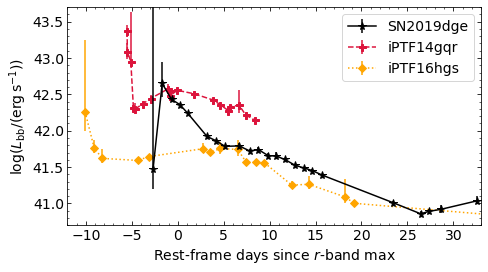

In [14]:
plt.figure(figsize=(7, 4))
ax0 = plt.subplot(111)
ms = 8

########## Lbb ##########
# AT2019dge
ax0.errorbar(trf, lgLbbs, [lgLbbs_uncl, lgLbbs_uncr], 
             fmt='.-', marker = "*", color = "k", zorder = 3, markersize = ms, label = "SN2019dge")
# iPTF14gqr
ax0.errorbar(trf2, lgLbbs2, [lgLbbs_uncl2, lgLbbs_uncr2], 
             fmt = '.--', color = "crimson", marker = "P", zorder = 2, markersize = ms-1, label = "iPTF14gqr")

ax0.errorbar(trf1, lgLbbs1, [lgLbbs_uncl1, lgLbbs_uncr1], 
             fmt = ".:", color = "orange", marker = "D", zorder = 1, markersize = ms-3, label = "iPTF16hgs")

ax0.set_ylim(40.7, 43.7)
#get_Lbol_decline_rate1(trf+toff, lgLbbs, lgLbbs_unc, ax0)
#get_Lbol_decline_rate2(trf+toff, lgLbbs, lgLbbs_unc, ax0)


xmin = -12
xmax = 33
ax0.set_xlim(xmin, xmax)

ax0.legend()
ax0.set_ylabel(r'${\rm log} ( L_{\rm bb} /{\rm(erg\,s^{-1} } ))$')
ax0.xaxis.set_major_locator(plt.MultipleLocator(5))
ax0.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax0.yaxis.set_major_locator(plt.MultipleLocator(0.5))
ax0.yaxis.set_minor_locator(plt.MultipleLocator(0.1))
ax0.tick_params(direction='in', axis='both', which = 'both', top=True, right=True)
ax0.tick_params(which = 'major', length = 4)
ax0.tick_params(which = 'minor', length = 2)
ax0.set_xlabel('Rest-frame days since $r$-band max')

plt.tight_layout(h_pad=0)
plt.savefig('../random/bbfits.pdf')